# Threshold Optimization for Classification Models

## 1. Import Dependencies

In [92]:
import joblib
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score, classification_report

warnings.filterwarnings('ignore')

## 2. Load Processed Data

In [93]:
X_train = np.load('artifacts/X_train.npz')['arr_0']
Y_train = np.load('artifacts/Y_train.npz')['arr_0']
X_test = np.load('artifacts/X_test.npz')['arr_0']
Y_test = np.load('artifacts/Y_test.npz')['arr_0']

print("Data loaded successfully from artifacts.")

Data loaded successfully from artifacts.


## 3. Train a Baseline Logistic Regression Model

In [94]:
model_lr = LogisticRegression(
    max_iter=1000,
    random_state=42
)
model_lr.fit(X_train, Y_train)
print("Logistic Regression model trained successfully.")

Logistic Regression model trained successfully.


## 4. Analyze Prediction Probabilities

Instead of using the default 0.5 threshold, we can analyze the distribution of predicted probabilities to find a more optimal cutoff point. This is especially useful for imbalanced datasets where the default threshold may not yield the best results.

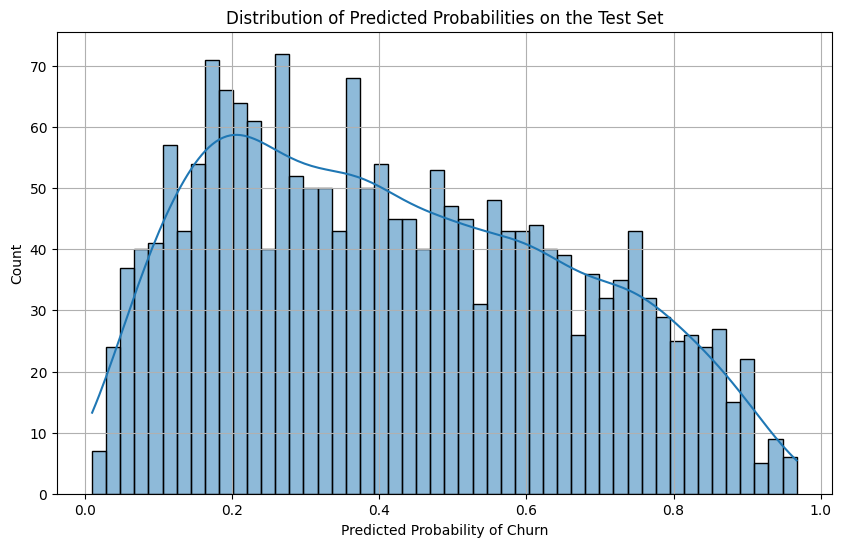

In [95]:
# Get prediction probabilities for the positive class (1)
Y_proba_test = model_lr.predict_proba(X_test)[:, 1]

# Plot the distribution of probabilities
plt.figure(figsize=(10, 6))
sns.histplot(Y_proba_test, bins=50, kde=True)
plt.xlabel('Predicted Probability of Churn')
plt.ylabel('Count')
plt.title('Distribution of Predicted Probabilities on the Test Set')
plt.grid(True)
plt.show()

## 5. Find the Optimal Threshold

We will iterate through a range of possible thresholds and calculate the F1-score for each one. The threshold that results in the highest F1-score will be selected as the optimal threshold.

In [96]:
thresholds = np.arange(0, 1.01, 0.01)
f1_scores = []

for t in thresholds:
    Y_hat_test = (Y_proba_test > t).astype(int)
    f1 = f1_score(Y_test, Y_hat_test)
    f1_scores.append(f1)

optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]
max_f1_score = f1_scores[optimal_idx]

print(f"Optimal Threshold: {optimal_threshold:.2f}")
print(f"Max F1-Score at this threshold: {max_f1_score:.4f}")

Optimal Threshold: 0.68
Max F1-Score at this threshold: 0.4717


## 6. Visualize Threshold vs. F1-Score

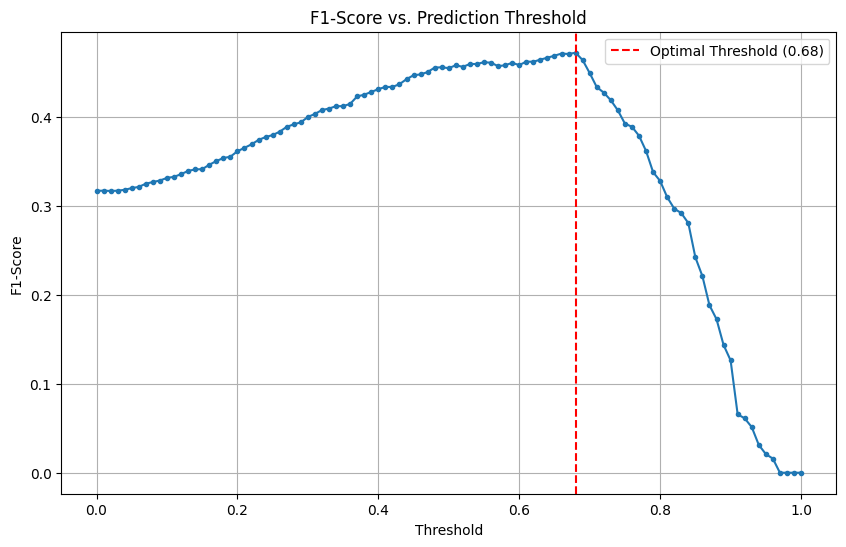

In [97]:
plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores, marker='.')
plt.axvline(x=optimal_threshold, color='r', linestyle='--', label=f'Optimal Threshold ({optimal_threshold:.2f})')
plt.xlabel('Threshold')
plt.ylabel('F1-Score')
plt.title('F1-Score vs. Prediction Threshold')
plt.legend()
plt.grid(True)
plt.show()

## 7. Evaluate Model with Optimal Threshold

--- Classification Report with Optimal Threshold ---
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      1623
           1       0.48      0.47      0.47       376

    accuracy                           0.80      1999
   macro avg       0.68      0.67      0.68      1999
weighted avg       0.80      0.80      0.80      1999



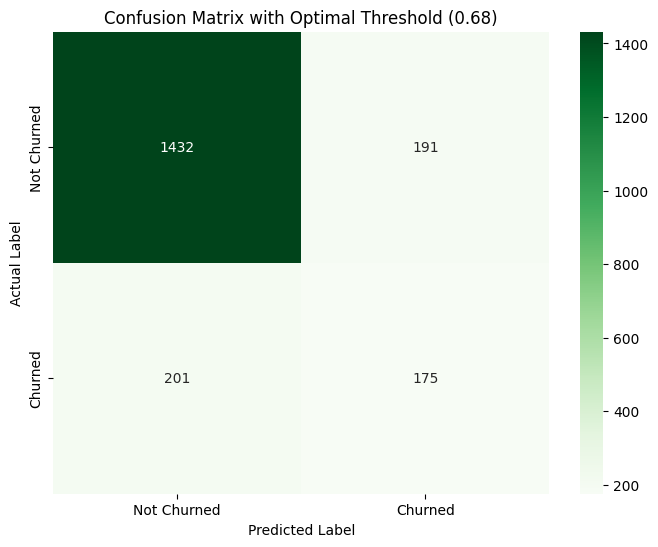

In [98]:
# Apply the optimal threshold to make final predictions
Y_hat_test_optimal = (Y_proba_test > optimal_threshold).astype(int)

print("--- Classification Report with Optimal Threshold ---")
print(classification_report(Y_test, Y_hat_test_optimal))

# Visualize the final confusion matrix
cm = confusion_matrix(Y_test, Y_hat_test_optimal)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Not Churned', 'Churned'],
            yticklabels=['Not Churned', 'Churned'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title(f'Confusion Matrix with Optimal Threshold ({optimal_threshold:.2f})')
plt.show()